In [2]:
# I've donwnloaded metadata for all encode experiments
!ls data/

metadata_encode_all.txt.gz


In [3]:
import pandas as pd
data = pd.read_csv("data/metadata_encode_all.txt.gz", compression = "gzip", sep="\t")

/home/vsfishman/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,20,23,24,27,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
pd.set_option('display.max_columns', None)
data

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
0,ENCFF781GYO,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,1,1_1,100.0,NaN,paired-ended,1.0,/files/ENCFF748HNR/,NaN,NaN,3348122249,"Brenton Graveley, UConn",f2ed753babff4d0ac21de8929773d08c,SRA:SRR4422129,https://www.encodeproject.org/files/ENCFF781GY...,NaN,Illumina HiSeq 2000,"/files/ENCFF385GEX/, /files/ENCFF403CZA/",released,s3://encode-public/2014/12/13/14c39310-ff5f-44...,missing biosample characterization,NaN,NaN
1,ENCFF521PWU,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,2,2_1,100.0,NaN,paired-ended,1.0,/files/ENCFF934BDQ/,NaN,NaN,2596104321,"Brenton Graveley, UConn",81f2b8e9405c79cd217a1e6ef2f93d8c,SRA:SRR4422128,https://www.encodeproject.org/files/ENCFF521PW...,NaN,Illumina HiSeq 2000,"/files/ENCFF385GEX/, /files/ENCFF403CZA/",released,s3://encode-public/2014/12/13/43a9dff7-d4e3-49...,missing biosample characterization,NaN,NaN
2,ENCFF748HNR,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,1,1_1,100.0,NaN,paired-ended,2.0,/files/ENCFF781GYO/,NaN,NaN,3239192567,"Brenton Graveley, UConn",9d03993de49ae4b6a78d3b7570df217f,SRA:SRR4422129,https://www.encodeproject.org/files/ENCFF748HN...,NaN,Illumina HiSeq 2000,"/files/ENCFF922CDR/, /files/ENCFF278TEH/",released,s3://encode-public/2014/12/13/d4eadc94-e45e-4e...,missing biosample characterization,NaN,NaN
3,ENCFF934BDQ,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,2,2_1,100.0,NaN,paired-ended,2.0,/files/ENCFF521PWU/,NaN,NaN,2508689891,"Brenton Graveley, UConn",3827eb377253ff0cb97e110fe514ce2c,SRA:SRR4422128,https://www.encodeproject.org/files/ENCFF934BD...,NaN,Illumina HiSeq 2000,"/files/ENCFF922CDR/, /files/ENCFF278TEH/",released,s3://encode-public/2014/12/13/c44057d9-c8fc-4e...,missing biosample characterization,NaN,NaN
4,ENCFF743IBK,bam,bam,NaN,alignments,hg19,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/

In [76]:
# these are all metadata terms
data.columns.values

array(['File accession', 'File format', 'File type', 'File format type',
       'Output type', 'File assembly', 'Experiment accession', 'Assay',
       'Biosample term id', 'Biosample term name', 'Biosample type',
       'Biosample organism', 'Biosample treatments',
       'Biosample treatments amount', 'Biosample treatments duration',
       'Biosample genetic modifications methods',
       'Biosample genetic modifications categories',
       'Biosample genetic modifications targets',
       'Biosample genetic modifications gene targets',
       'Biosample genetic modifications site coordinates',
       'Biosample genetic modifications zygosity', 'Experiment target',
       'Library made from', 'Library depleted in',
       'Library extraction method', 'Library lysis method',
       'Library crosslinking method', 'Library strand specific',
       'Experiment date released', 'Project',
       'RBNS protein concentration', 'Library fragmentation method',
       'Library size range', 'Bi

In [79]:
# Here are, for example, assay (=experiment) types
data["Assay"].unique()

array(['shRNA RNA-seq', 'TF ChIP-seq', 'polyA plus RNA-seq',
       'Histone ChIP-seq', 'CRISPR RNA-seq', 'WGBS', 'ATAC-seq',
       'small RNA-seq', 'RNA microarray', 'RNA Bind-n-Seq', 'CAGE',
       'icSHAPE', 'FAIRE-seq', 'DNase-seq', 'Control eCLIP', 'Hi-C',
       'total RNA-seq', 'RRBS', 'polyA minus RNA-seq', 'MeDIP-seq',
       'Repli-chip', 'scRNA-seq', 'RNA-PET', 'RAMPAGE', 'RIP-seq',
       'eCLIP', 'RIP-chip', 'ChIA-PET', 'Repli-seq', 'microRNA counts',
       'Control ChIP-seq', 'iCLIP', 'genotyping array', 'BruChase-seq',
       'MNase-seq', '5C', 'microRNA-seq', 'Bru-seq', 'GM DNase-seq',
       'DNA-PET', 'MS-MS', 'TAB-seq', 'DNAme array', 'siRNA RNA-seq',
       'genotyping HTS', 'PAS-seq', 'MRE-seq', "5' RLM RACE", 'WGS',
       'Mint-ChIP-seq', 'CRISPRi RNA-seq', 'Control Mint-ChIP-seq',
       'snATAC-seq', 'BruUV-seq', 'SPRITE', 'Switchgear',
       'long read RNA-seq', 'icLASER', 'Circulome-seq'], dtype=object)

In [31]:
data["Experiment target"].unique()[0:100]

array(['NONO-human', 'ZC3H8-human', 'POLR2AphosphoS5-human', nan,
       'UTP3-human', 'H3K9ac-human', 'unc-39-celegans', 'SRSF4-human',
       'H3K9me3-human', 'zip-8-celegans', 'ESRRG-human', 'POLR2A-mouse',
       'efl-1-celegans', 'H3K4me3-human', 'daf-12-celegans',
       'EP300-human', 'repo-1-celegans', 'SIN3A-human', 'H3K27ac-human',
       'atf-7-celegans', 'CG10543-dmelanogaster', 'GATA3-human',
       'nau-dmelanogaster', 'DLX4-human', 'STAT3-human', 'ESR1-human',
       'vab-15-celegans', 'sea-2-celegans', 'ceh-79-celegans',
       'RRP9-human', 'NR3C1-human', 'H3K27me3-human', 'dpff-1-celegans',
       'CHD7-human', 'MAX-human', 'fkh-6-celegans', 'unc-86-celegans',
       'RFX5-human', 'unc-62-celegans', 'CG8944-dmelanogaster',
       'H3K36me3-human', 'CTCF-human', 'JUN-human', 'USF1-human',
       'MAFF-human', 'UBTF-human', 'RPS3A-human', 'MXI1-human',
       'MYNN-human', 'IRF1-human', 'H2AFZ-human', 'zip-2-celegans',
       'H3K4me1-mouse', 'F23B12.7-celegans', 'H3K9m

In [337]:
data["File format"].unique()

array(['fastq', 'bam', 'bigWig', 'tsv', 'tar', 'bigBed broadPeak',
       'bed broadPeak', 'bed narrowPeak', 'bigBed narrowPeak',
       'bed idr_ranked_peak', 'tagAlign', 'bed bedMethyl',
       'bigBed bedMethyl', 'bigBed bed3+', 'bigBed bedRnaElements', 'gtf',
       'bed bedRnaElements', 'bigBed bedExonScore', 'bed bedExonScore',
       'bigBed tss_peak', 'gff gff3', 'bed tss_peak', 'bed bed3+',
       'starch', 'bed idr_peak', 'bigBed idr_peak', 'bigBed bed12',
       'bed bed12', 'csfasta', 'csqual', 'rcc', 'bed bed6+',
       'bigBed bed6+', 'bigBed bed9', 'bed bed9', 'bigBed bedLogR',
       'bed bedLogR', 'hic', 'bedpe', 'fasta', 'bigBed peptideMapping',
       'bed peptideMapping', 'bed bedGraph', 'idat', 'sam', 'wig',
       'bigInteract', 'vcf', 'CEL', 'hdf5', 'bigBed modPepMap',
       'bigBed pepMap', 'bed modPepMap', 'bed pepMap', 'bed bed3',
       'bigBed bed3'], dtype=object)

In [23]:
# keep only one file / experiment
# TODO - check later that metadata is the same for different files originating from one experiment
un_exp = data.drop_duplicates(subset=["Experiment accession"],keep="first")
un_exp

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
0,ENCFF781GYO,fastq,fastq,NaN,reads,NaN,ENCSR647NYX,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/NONO-human/,NaN,NaN,NaN,NONO-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2014-12-17,ENCODE,NaN,chemical (Illumina TruSeq),>200,1,1_1,100.0,NaN,paired-ended,1.0,/files/ENCFF748HNR/,NaN,NaN,3348122249,"Brenton Graveley, UConn",f2ed753babff4d0ac21de8929773d08c,SRA:SRR4422129,https://www.encodeproject.org/files/ENCFF781GY...,NaN,Illumina HiSeq 2000,"/files/ENCFF385GEX/, /files/ENCFF403CZA/",released,s3://encode-public/2014/12/13/14c39310-ff5f-44...,missing biosample characterization,NaN,NaN
74,ENCFF942LXF,tsv,tsv,NaN,differential expression quantifications,hg19,ENCSR696JWA,shRNA RNA-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/ZC3H8-human/,NaN,NaN,NaN,ZC3H8-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2017-12-06,ENCODE,NaN,chemical (Illumina TruSeq),>200,"1, 2","1_1, 2_1",NaN,NaN,NaN,NaN,NaN,NaN,"/files/ENCFF994ZAW/, /files/ENCFF100FFS/, /fil...",2832086,"Brenton Graveley, UConn",95b3e1180f13934c19b645539ab68044,NaN,https://www.encodeproject.org/files/ENCFF942LX...,V19,NaN,NaN,released,s3://encode-public/2018/04/26/90d41d2f-dc65-41...,missing biosample characterization,NaN,NaN
148,ENCFF000PMW,bam,bam,NaN,alignments,hg19,ENCSR000BPI,TF ChIP-seq,EFO:0001187,HepG2,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLR2AphosphoS5-human,DNA,NaN,NaN,NaN,NaN,NaN,2012-02-29,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF000PNI/,584941358,"Richard Myers, HAIB",a39f05c87bd04bea02f72a99dc090f66,NaN,https://www.encodeproject.org/files/ENCFF000PM...,NaN,NaN,NaN,archived,s3://encode-public/2012/01/23/44ab5670-8e59-49...,"low read depth, low read length",NaN,NaN
222,ENCFF576OBS,fastq,fastq,NaN,reads,NaN,ENCSR001UXR,polyA plus RNA-seq,UBERON:0001264,pancreas,tissue,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,polyadenylated mRNA,NaN,RNeasy Lipid Tissue Mini Kit (QIAGEN cat#74804),NaN,NaN,strand-specific,2015-01-08,ENCODE,NaN,chemical (Illumina TruSeq),350-450,1,1_1,100.0,NaN,paired-ended,1.0,/files/ENCFF063OPQ/,NaN,NaN,930456234,"Michael Snyder, Stanford",8cfb373d2ca4a474f19876176da7d5ab,SRA:SRR5171067,https://www.encodeproject.org/files/ENCFF576OB...,NaN,Illumina HiSeq 2000,NaN,released,s3://encode-public/2015/01/07/0d5be7df-cfdc-44...,"low read depth, low replicate concordance",insufficient read depth,NaN
258,ENCFF537TJE,tsv,tsv,NaN,differential expression quantifications,hg19,ENCSR818TZM,shRNA RNA-seq,EFO:0002067,K562,cell line,Homo sapiens,NaN,NaN,NaN,RNAi,interference,/targets/UTP3-human/,NaN,NaN,NaN,UTP3-human,polyadenylated mRNA,NaN,Maxwell 16 LEV simpleRNA Cells Kit (Promega ca...,NaN,NaN,strand-specific,2017-12-06,ENCODE,NaN,chemical (Illumina TruSeq),>200,"1, 

In [35]:
# download "reference epigenome" collection
!wget https://www.encodeproject.org/metadata/?type=Experiment&related_series.%40type=ReferenceEpigenome&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens -o data/metadata_encode_reference_epigenome.tsv

/bin/bash: related_series.%40type=ReferenceEpigenome: command not found
/bin/bash: replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens: command not found
--2021-02-21 07:21:25--  https://www.encodeproject.org/metadata/?type=Experiment
Resolving www.encodeproject.org (www.encodeproject.org)... 
SIGHUP received.
Redirecting output to ‘wget-log’.


In [50]:
# download "reference epigenome" collection
ref_epigenome = pd.read_csv("data/metadata_encode_reference_epigenome.tsv.gz", compression = "gzip", sep="\t").drop_duplicates(subset=["Experiment accession"],keep="first")

/home/vsfishman/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,20,23,24,27,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [270]:
condition = (~pd.isna(ref_epigenome["Biosample treatments"])) | \
              (~pd.isna(ref_epigenome["Biosample genetic modifications methods"])) 
               
ref_epigenome[condition & (ref_epigenome["Assay"]=="total RNA-seq")]

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
2463,ENCFF576MWA,fastq,fastq,NaN,reads,NaN,ENCSR189AYS,total RNA-seq,UBERON:0000468,whole organism,whole organisms,Caenorhabditis elegans,NaN,NaN,NaN,mutagen treatment,mutagenesis,/targets/fkh-6-celegans/,NaN,NaN,homozygous,fkh-6-celegans,RNA,rRNA,Trizol,NaN,NaN,NaN,2019-03-22,modERN,NaN,shearing (Covaris generic),350-600,1,1_1,75.0,NaN,paired-ended,1.0,/files/ENCFF266NVM/,NaN,NaN,804971201,"Robert Waterston, UW",92b0a2aaa09cb6378ced9bd1da6ad372,NaN,https://www.encodeproject.org/files/ENCFF576MW...,NaN,Illumina NextSeq 500,NaN,released,s3://encode-public/2017/12/20/43e93279-1b35-48...,"missing biosample characterization, lacking pr...",NaN,NaN
2557,ENCFF345IZR,fastq,fastq,NaN,reads,NaN,ENCSR456WVO,total RNA-seq,UBERON:0000468,whole organism,whole organisms,Caenorhabditis elegans,NaN,NaN,NaN,mutagen treatment,mutagenesis,/targets/unc-86-celegans/,NaN,NaN,homozygous,unc-86-celegans,RNA,rRNA,Trizol,NaN,NaN,NaN,2019-03-22,modERN,NaN,shearing (Covaris generic),350-600,1,1_1,75.0,NaN,paired-ended,2.0,/files/ENCFF433WQX/,NaN,NaN,83201226,"Robert Waterston, UW",85bf71e00f7fcba67010590f4c6af084,NaN,https://www.encodeproject.org/files/ENCFF345IZ...,NaN,Illumina NextSeq 500,NaN,released,s3://encode-public/2017/12/22/be86e018-7b9e-45...,"missing biosample characterization, lacking pr...",NaN,NaN
7215,ENCFF533AUL,fastq,fastq,NaN,reads,NaN,ENCSR181KQJ,total RNA-seq,EFO:0002055,G1E-ER4,cell line,Mus musculus,17β-estradiol,10 nM,24 hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA,NaN,NaN,NaN,NaN,strand-specific,2014-11-20,ENCODE,NaN,chemical (Nextera tagmentation),>200,1,1_1,75.0,NaN,paired-ended,1.0,/files/ENCFF366KMQ/,NaN,NaN,10256411946,"Ross Hardison, PennState",e9339005573675b5103111b62f02368f,SRA:SRR3192571,https://www.encodeproject.org/files/ENCFF533AU...,NaN,Illumina HiSeq 2000,NaN,released,s3://encode-public/2014/10/22/d02e0464-e161-48...,NaN,NaN,NaN
14635,ENCFF792KMZ,fastq,fastq,NaN,reads,NaN,ENCSR973XTF,total RNA-seq,UBERON:0000468,whole organism,whole organisms,Caenorhabditis elegans,NaN,NaN,NaN,mutagen treatment,mutagenesis,/targets/zip-5-celegans/,NaN,NaN,homozygous,zip-5-celegans,RNA,rRNA,Trizol,NaN,NaN,NaN,2019-03-22,modERN,NaN,shearing (Covaris generic),350-600,1,1_1,75.0,NaN,paired-ended,1.0,/files/ENCFF383MOR/,NaN,NaN,826390205,"Robert Waterston, UW",2ae99ba33961c3ab1b702bff439cfac4,NaN,https://www.encodeproject.org/files/ENCFF792KM...,NaN,Illumina HiSeq 2500,NaN,released,s3://encode-public/2017/12/22/534b2741-72b8-4e...,"missing biosample characterization, lacking pr...",NaN,NaN
16571,ENCFF957NPC,fastq,fastq,NaN,reads,NaN,ENCSR373KSR,total RNA-seq,UBERON:0000468,whole organism,whole organisms,Caenorhabditis elegans,NaN,NaN,NaN,mutagen treatment,mutagenesis,/targets/zip-5-celegans/,NaN,NaN,homozygous,zip-5-celegans,RNA,rRNA,Trizol,NaN,NaN,NaN,2019-03-22,modERN,NaN,shearing (Covaris generic),350-600,1,1_1,75.0,NaN,paired-ended,1.0,/files/ENCFF707CMA/,NaN,NaN,879920970,"Robert Waterston, UW",bb37ea

In [327]:
# lets convert the data in a following way:
# any modified cell (i.e. treated with chemicals, RNAi, CRISPRed, etc --> gains new cell type
# any modified assy (i.e. specific TF for ChIP-seq) --> gains new assay label

# TODO: if one has genetically inseted tag to run ChIP-seq, it will be treated as a new cell type

def relabel_data(row):
    full_assay = row.Assay
    nanfilled = row.fillna("0")
    modified_line = any(nanfilled[["Biosample treatments","Biosample treatments amount",
       "Biosample treatments duration","Biosample genetic modifications methods",
       'Biosample genetic modifications categories',
       'Biosample genetic modifications targets',
       'Biosample genetic modifications gene targets',
       'Biosample genetic modifications site coordinates',
       'Biosample genetic modifications zygosity']].values != "0")
    
    full_cell_type = ".".join(nanfilled[["Biosample term name","Biosample type",
       "Biosample organism","Biosample treatments","Biosample treatments amount",
       "Biosample treatments duration","Biosample genetic modifications methods",
       'Biosample genetic modifications categories',
       'Biosample genetic modifications targets',
       'Biosample genetic modifications gene targets',
       'Biosample genetic modifications site coordinates',
       'Biosample genetic modifications zygosity']].values)
    # this is to treat assay names as "CRISPR RNA-seq", "shRNA RNA-seq", etc. 
    # as same assay (RNA-seq)
    # what makes difference between RNA-seq is "Library made from" field
    # could be polyA+, small RNA, total RNA, etc.
    if "RNA-seq" in row.Assay:
        full_assay = "RNA-seq " + nanfilled["Library made from"]
        if row["Experiment target"] != "0":
            full_cell_type += "." + str(row["Experiment target"])
    elif "ChIP" in row.Assay: # for ChIP different antibodies = different features
        full_assay += "." + str(row["Experiment target"])
#     else:
#         if row["Experiment target"] is not None:
#             print (row)
#             raise
    row["full_assay"] = full_assay
    row["full_cell_type"] = full_cell_type
    row["modified_cell_type"] = modified_line
    return row

# takes ~1 min for 20k lines

relabeled_data = un_exp.apply(relabel_data, axis = 1)

In [330]:
print ("N experiments: ",len(relabeled_data))

# filter by species
relabeled_data_mammals = relabeled_data[(relabeled_data["Biosample organism"] == "Homo sapiens") | \
                                        (relabeled_data["Biosample organism"] == "Mus musculus")]
print ("Filter mammals: -->",len(relabeled_data_mammals))

# filter by audit (i.e. remove low qoulity datasets)
relabeled_data_mammals = relabeled_data_mammals[pd.isna(
                    relabeled_data_mammals["Audit ERROR"])]
print ("Filter AUDIT: -->",len(relabeled_data_mammals))

relabeled_data_mammals_nontreated = relabeled_data_mammals.query("modified_cell_type==False")
print ("*Filter modified line: -->",len(relabeled_data_mammals_nontreated))

N experiments:  19349
Filter mammals: --> 16244
Filter AUDIT: --> 15583
*Filter modified line: --> 12559


In [316]:
#relabeled_data[relabeled_data["Biosample term name"]=="pancreas"]
relabeled_data[~pd.isna(relabeled_data["Audit ERROR"])]

,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample organism,Biosample treatments,Biosample treatments amount,Biosample treatments duration,Biosample genetic modifications methods,Biosample genetic modifications categories,Biosample genetic modifications targets,Biosample genetic modifications gene targets,Biosample genetic modifications site coordinates,Biosample genetic modifications zygosity,Experiment target,Library made from,Library depleted in,Library extraction method,Library lysis method,Library crosslinking method,Library strand specific,Experiment date released,Project,RBNS protein concentration,Library fragmentation method,Library size range,Biological replicate(s),Technical replicate(s),Read length,Mapped read length,Run type,Paired end,Paired with,Index of,Derived from,Size,Lab,md5sum,dbxrefs,File download URL,Genome annotation,Platform,Controlled by,File Status,s3_uri,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR,full_assay,full_cell_type
989,ENCFF049QMK,bigWig,bigWig,NaN,fold change over control,mm10,ENCSR351YUI,ATAC-seq,CL:0000775,neutrophil,primary cell,Mus musculus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DNA,NaN,NaN,NaN,NaN,NaN,2017-11-15,ENCODE,NaN,NaN,"151-347, 151-379",2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF185EAE/,146781001,ENCODE Processing Pipeline,4f4a67be29dac07686400013f552a9e0,NaN,https://www.encodeproject.org/files/ENCFF049QM...,NaN,NaN,NaN,released,s3://encode-public/2020/10/16/88519bf4-e10e-43...,"mild to moderate bottlenecking, moderate TSS e...","severe bottlenecking, insufficient number of r...",extremely low read depth,ATAC-seq,neutrophil.primary cell.Mus musculus.0.0.0.0.0...
2473,ENCFF000BTO,bam,bam,NaN,alignments,hg19,ENCSR000ALD,Histone ChIP-seq,CL:0002618,endothelial cell of umbilical vein,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H3K9ac-human,DNA,NaN,NaN,NaN,NaN,NaN,2011-02-10,ENCODE,NaN,see document,NaN,3,3_3,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF000BTW/,252318469,"Bradley Bernstein, Broad",8c27545dca8bf8e628b1961a03363dcc,NaN,https://www.encodeproject.org/files/ENCFF000BT...,NaN,NaN,NaN,archived,s3://encode-public/2010/11/16/5516325d-776d-47...,"low read length, control low read depth",insufficient read depth,extremely low read depth,Histone ChIP-seq.H3K9ac-human,endothelial cell of umbilical vein.primary cel...
2789,ENCFF000CNH,bam,bam,NaN,alignments,hg19,ENCSR000ALL,Histone ChIP-seq,CL:0000312,keratinocyte,primary cell,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H3K27me3-human,DNA,NaN,NaN,NaN,NaN,NaN,2011-02-10,ENCODE,NaN,see document,NaN,2,2_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF000CNO/,178388636,"Bradley Bernstein, Broad",214ae3fc0d27030c5984d41cc4658fd5,NaN,https://www.encodeproject.org/files/ENCFF000CN...,NaN,NaN,NaN,archived,s3://encode-public/2010/11/16/c77d6d53-47cd-47...,low read length,"insufficient read depth, control insufficient ...",extremely low read depth,Histone ChIP-seq.H3K27me3-human,keratinocyte.primary cell.Homo sapiens.0.0.0.0...
3155,ENCFF001HEI,bam,bam,NaN,alignments,hg19,ENCSR000DRK,TF ChIP-seq,EFO:0005343,GM12870,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CTCF-human,DNA,NaN,NaN,NaN,NaN,NaN,2012-01-17,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF001HEQ/,449758791,"John Stamatoyannopoulos, UW",45a1cab7f6fb1110a43c5c5b2b7e9662,NaN,https://www.encodeproject.org/files/ENCFF001HE...,NaN,NaN,NaN,archived,s3://encode-public/2011/06/25/9a6b2a9b-a4e5-41...,low read length,"insufficient read depth, missing possible_cont...",extremely low read depth,TF ChIP-seq.CTCF-human,GM12870.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0
3403,ENCFF000OGR,bam,bam,NaN,alignments,hg19,ENCSR000BGI,TF ChIP-seq,EFO:0002784,GM12878,cell line,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USF1-human,DNA,NaN,NaN,NaN,NaN,NaN,2011-07-18,ENCODE,NaN,see document,NaN,1,1_1,NaN,NaN,NaN,NaN,NaN,NaN,/files/ENCFF000OHD/,

In [331]:
# convert experiment table to cellType-feature matrix
def data2pivot(data):
    encode_agg_full = pd.pivot_table(data,
                                 index="full_cell_type", columns=["full_assay"], 
                                 values="Experiment accession", 
                                 aggfunc=len, fill_value=0)   
    # same experiment mult times -> 1 experiment
    encode_agg_full = encode_agg_full.applymap(lambda x: min(x,1)) 

    # drop controls if they are counted as independent features
    encode_agg_full.drop(columns=[i for i in encode_agg_full.columns.values if "control" in i.lower()], 
                         inplace=True)

    # add row/col sums and sort
    encode_agg_full["rowsums"] = encode_agg_full.sum(axis="columns")
    encode_agg_full.loc["colsums",:] = encode_agg_full.sum(axis="index")
    encode_agg_full.sort_values(by="rowsums", axis = 0, ascending=False, inplace=True)
    encode_agg_full.sort_values(by="colsums", axis = 1, ascending=False, inplace=True)
    return encode_agg_full

In [333]:
encode_agg_full = data2pivot(relabeled_data_mammals)
encode_agg_full_nontreated = data2pivot(relabeled_data_mammals_nontreated)
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
encode_agg_full

full_assay                                          rowsums  RNA-seq polyadenylated mRNA  DNase-seq  RNA-seq RNA  Histone ChIP-seq.H3K4me3-human  ATAC-seq  Histone ChIP-seq.H3K27ac-human  Histone ChIP-seq.H3K36me3-human  Histone ChIP-seq.H3K9me3-human  Histone ChIP-seq.H3K4me1-human  Histone ChIP-seq.H3K27me3-human  TF ChIP-seq.CTCF-human   RRBS  DNAme array  RNA-seq miRNA  RNA microarray  RAMPAGE  genotyping array  WGBS  Histone ChIP-seq.H3K9ac-human  Hi-C  Histone ChIP-seq.H3K4me2-human  Repli-chip  Histone ChIP-seq.H2AFZ-human  TF ChIP-seq.POLR2A-human  GM DNase-seq  Histone ChIP-seq.H3K79me2-human  ChIA-PET  microRNA counts  TF ChIP-seq.EP300-human  Histone ChIP-seq.H3K4me1-mouse  Histone ChIP-seq.H4K20me1-human  FAIRE-seq  CAGE  Histone ChIP-seq.H3K4me3-mouse  Histone ChIP-seq.H3K27me3-mouse  Histone ChIP-seq.H3K27ac-mouse  Histone ChIP-seq.H3K36me3-mouse  TF ChIP-seq.RAD21-human  TF ChIP-seq.JUN-human  TF ChIP-seq.POLR2AphosphoS5-human  TF ChIP-seq.NR3C1-human  \
full_cell_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
colsums                                              7507.0                        919.0      514.0        362.0                           233.0     216.0                           187.0                            184.0                           183.0                           182.0                            178.0                   137.0  115.0        115.0          111.0           104.0    102.0              84.0  82.0                           78.0  61.0                            53.0        48.0                          46.0                      46.0          45.0                             44.0      43.0             43.0                     39.0                            38.0                             37.0       37.0  35.0                            34.0                             33.0                            31.0                             30.0                     28.0                   26.0                               26.0                     25.0   
K562.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0         335.0                          0.0        1.0          0.0                             1.0       1.0                             0.0                              1.0                             1.0                             1.0                              1.0                     1.0    1.0          1.0            0.0             1.0      1.0               1.0   1.0                            1.0   1.0                             1.0         0.0                           1.0                       1.0           0.0                              1.0       1.0              1.0                      1.0                             0.0                              1.0        1.0   1.0                             0.0                              0.0                             0.0                              0.0                      1.0                    1.0                                1.0                      1.0   
GM12878.cell line.Homo sapiens.0.0.0.0.0.0.0.0.0      187.0     

In [321]:
# drow heatmap figure

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.cm as cm

def plot_data_matrix(encode_agg_full, filter_rows = 0, filter_cols = 0, title=""):
    a = encode_agg_full.loc[encode_agg_full["rowsums"] > filter_rows,
                        encode_agg_full.loc["colsums"] > filter_cols].\
                                drop("colsums",axis="index").\
                                drop("rowsums",axis="columns")

    # more readable index (=cell type names)
    a.index = a.index.map(lambda x: x.split(".")[0])

    rowsums = a.sum(axis="columns")
    colsums = a.sum(axis="index")

    row_mapper = cm.ScalarMappable(norm=matplotlib.colors.LogNorm(
        vmin=0.1, vmax=max(rowsums), clip=True), 
                                   cmap=cm.OrRd)
    col_mapper = cm.ScalarMappable(norm=matplotlib.colors.LogNorm(
        vmin=0.1, vmax=max(colsums), clip=True), 
                                   cmap=cm.Blues)


    cmap = sns.clustermap(a, row_cluster=False, col_cluster=False, cbar_pos=None,
                         row_colors = list(map(row_mapper.to_rgba,rowsums)),
                         col_colors = list(map(col_mapper.to_rgba,colsums)))
    plt.colorbar(row_mapper, ax=cmap.ax_row_dendrogram, fraction=1)
    plt.colorbar(col_mapper, ax=cmap.ax_col_dendrogram, orientation='horizontal', pad=0,
                fraction=1)
    cmap.ax_col_dendrogram.set_title(title+" Filter: rows >"+str(filter_rows)+" cols > "+str(filter_cols)+" size="+str(a.shape))

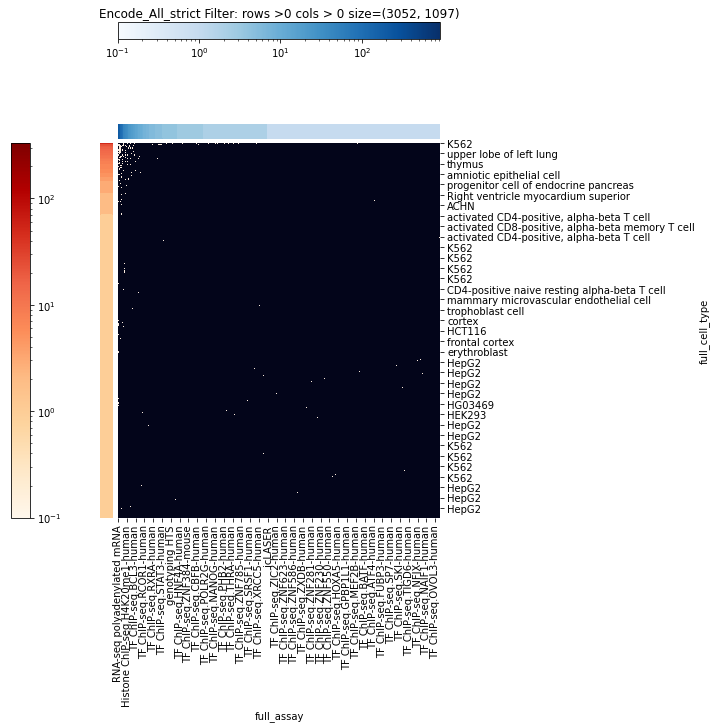

In [322]:
plot_data_matrix(encode_agg_full, filter_rows = 0, filter_cols = 0, title = "Encode_All_strict")

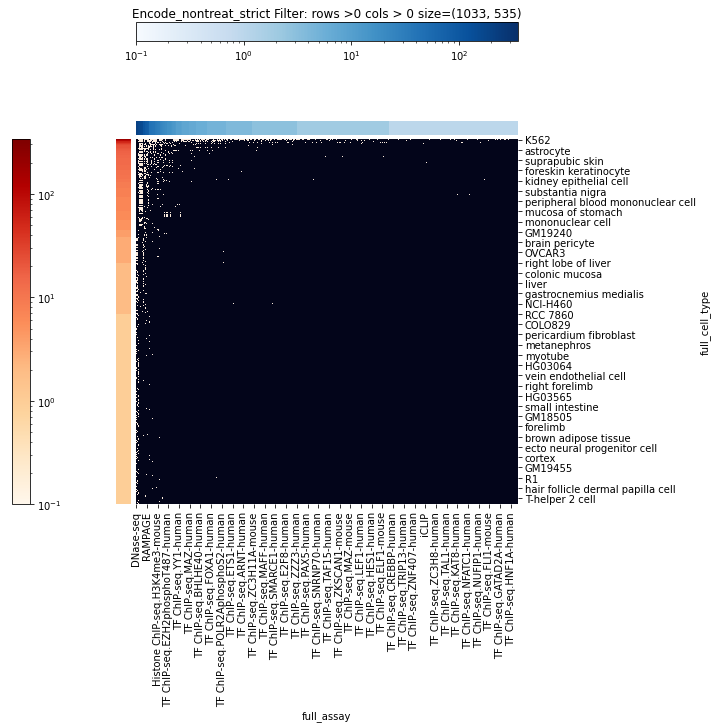

In [334]:
plot_data_matrix(encode_agg_full_nontreated, filter_rows = 0, filter_cols = 0, 
                 title = "Encode_nontreat_strict")

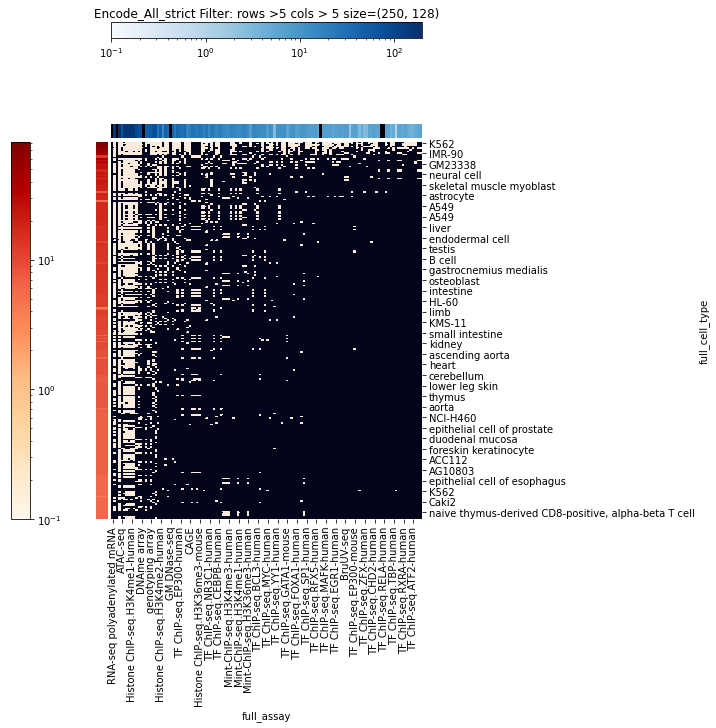

In [323]:
plot_data_matrix(encode_agg_full, filter_rows = 5, filter_cols = 5, title = "Encode_All_strict")

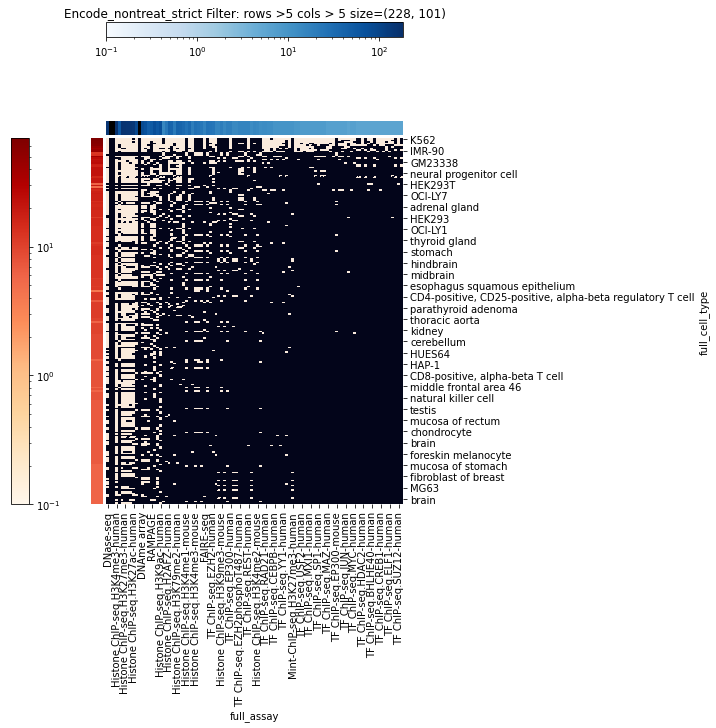

In [335]:
plot_data_matrix(encode_agg_full_nontreated, filter_rows = 5, filter_cols = 5, 
                 title = "Encode_nontreat_strict")

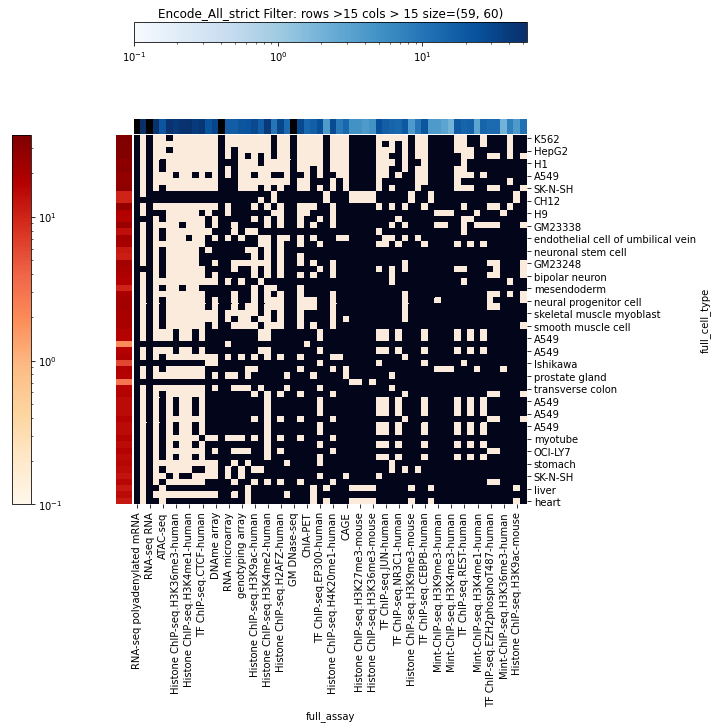

In [324]:
plot_data_matrix(encode_agg_full, filter_rows = 15, filter_cols = 15, title = "Encode_All_strict")

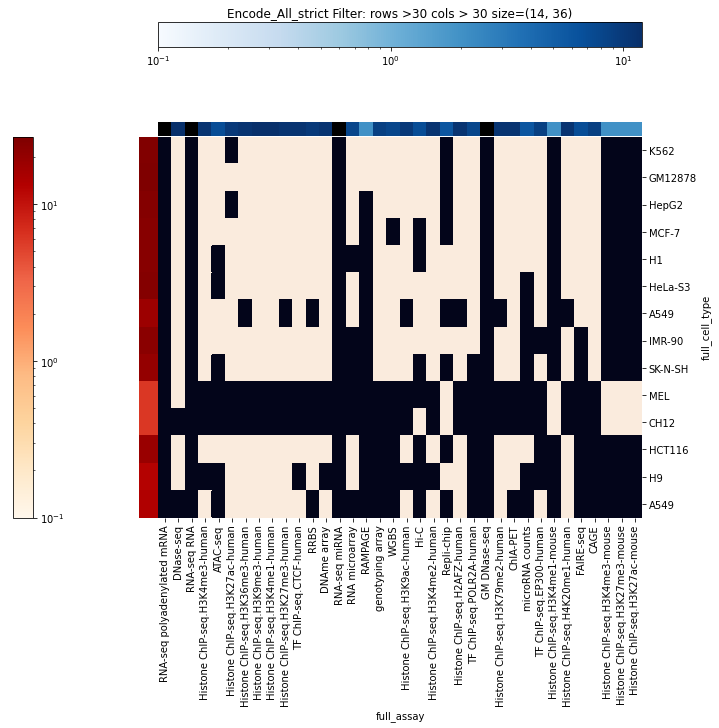

In [325]:
plot_data_matrix(encode_agg_full, filter_rows = 30, filter_cols = 30, title = "Encode_All_strict")

In [336]:
encode_agg_full_nontreated

full_assay,rowsums,DNase-seq,RNA-seq RNA,RNA-seq polyadenylated mRNA,Histone ChIP-seq.H3K4me3-human,ATAC-seq,Histone ChIP-seq.H3K36me3-human,Histone ChIP-seq.H3K27me3-human,Histone ChIP-seq.H3K9me3-human,Histone ChIP-seq.H3K4me1-human,Histone ChIP-seq.H3K27ac-human,TF ChIP-seq.CTCF-human,RNA-seq miRNA,DNAme array,RRBS,RNA microarray,RAMPAGE,WGBS,genotyping array,Histone ChIP-seq.H3K9ac-human,Repli-chip,ChIA-PET,Histone ChIP-seq.H2AFZ-human,microRNA counts,Hi-C,Histone ChIP-seq.H3K79me2-human,Histone ChIP-seq.H3K4me2-human,TF ChIP-seq.POLR2A-human,Histone ChIP-seq.H3K4me1-mouse,Histone ChIP-seq.H4K20me1-human,CAGE,Histone ChIP-seq.H3K4me3-mouse,Histone ChIP-seq.H3K27me3-mouse,Histone ChIP-seq.H3K27ac-mouse,FAIRE-seq,Histone ChIP-seq.H3K36me3-mouse,TF ChIP-seq.POLR2AphosphoS5-human,TF ChIP-seq.EZH2-human,Repli-seq,Mint-ChIP-seq.H3K9me3-human,Histone ChIP-seq.H3K9me3-mouse,Mint-ChIP-seq.H3K27ac-human,TF ChIP-seq.CTCF-mouse,TF ChIP-seq.EP300-human,Mint-ChIP-seq.H3K4me3-human,Mint-ChIP-seq.H3K4me1-human,TF ChIP-seq.EZH2phosphoT487-human,Histone ChIP-seq.H3K9me2-human,Histone ChIP-seq.H3K9ac-mouse,TF ChIP-seq.REST-human,Mint-ChIP-seq.H3K36me3-human,Histone ChIP-seq.H3F3A-human,Histone ChIP-seq.H3K4me2-mouse,TF ChIP-seq.POLR2A-mouse,TF ChIP-seq.MAX-human,TF ChIP-seq.RAD21-human,RNA-PET,TF ChIP-seq.TAF1-human,TF ChIP-seq.CEBPB-human,TF ChIP-seq.JUND-human,TF ChIP-seq.SIN3A-human,TF ChIP-seq.YY1-human,WGS,5C,Mint-ChIP-seq.H3K27me3-human,TF ChIP-seq.RFX5-human,TF ChIP-seq.GABPA-human,TF ChIP-seq.USF2-human,TF ChIP-seq.MAFK-human,TF ChIP-seq.RCOR1-human,TF ChIP-seq.MXI1-human,TF ChIP-seq.SMC3-human,BruUV-seq,TF ChIP-seq.SP1-human,BruChase-seq,Bru-seq,TF ChIP-seq.MAZ-human,TF ChIP-seq.CHD2-human,TF ChIP-seq.SRF-human,TF ChIP-seq.EP300-mouse,TF ChIP-seq.EGR1-human,TF ChIP-seq.TEAD4-human,TF ChIP-seq.JUN-human,TF ChIP-seq.ZNF274-human,TF ChIP-seq.TCF12-human,TF ChIP-seq.MYC-human,Histone ChIP-seq.H2BK120ac-human,Histone ChIP-seq.H3K79me1-human,TF ChIP-seq.HDAC2-human,Histone ChIP-seq.H2AK5ac-human,TF ChIP-seq.FOXM1-human,TF ChIP-seq.BHLHE40-human,Histone ChIP-seq.H3K4ac-human,TF ChIP-seq.ZBTB33-human,TF ChIP-seq.CREB1-human,TF ChIP-seq.NRF1-human,TF ChIP-seq.ELK1-human,TF ChIP-seq.ELF1-human,TF ChIP-seq.TCF7L2-human,Histone ChIP-seq.H3K23ac-human,TF ChIP-seq.SUZ12-human,Histone ChIP-seq.H2BK5ac-human,TF ChIP-seq.NFIC-human,TF ChIP-seq.TARDBP-human,Histone ChIP-seq.H3K79me2-mouse,TF ChIP-seq.FOXK2-human,TF ChIP-seq.FOXA1-human,Histone ChIP-seq.H4K8ac-human,MRE-seq,TF ChIP-seq.USF1-human,TF ChIP-seq.CHD1-human,Histone ChIP-seq.H4K91ac-human,RIP-chip,TF ChIP-seq.GTF2F1-human,TF ChIP-seq.GATA1-mouse,TF ChIP-seq.HCFC1-human,TF ChIP-seq.BRCA1-human,Histone ChIP-seq.H2BK15ac-human,TF ChIP-seq.KDM1A-human,TF ChIP-seq.ATF3-human,Histone ChIP-seq.H2BK12ac-human,TF ChIP-seq.POLR2AphosphoS2-human,TF ChIP-seq.TBP-human,TF ChIP-seq.RXRA-human,TF ChIP-seq.ZFX-human,TF ChIP-seq.ZFP36-human,Histone ChIP-seq.H3K14ac-human,Histone ChIP-seq.H3K18ac-human,TF ChIP-seq.ESRRA-human,TF ChIP-seq.NBN-human,TF ChIP-seq.KDM5A-human,TF ChIP-seq.TAL1-mouse,TF ChIP-seq.MAX-mouse,TF ChIP-seq.RAD51-human,TF ChIP-seq.JUNB-human,TF ChIP-seq.IRF3-human,TF ChIP-seq.ETS1-human,TF ChIP-seq.NFE2L2-human,TF ChIP-seq.GATA3-human,TF ChIP-seq.SREBF1-human,TF ChIP-seq.NR2F2-human,MeDIP-seq,TF ChIP-seq.NR2C2-human,TF ChIP-seq.FOSL2-human,TF ChIP-seq.HDGF-human,TF ChIP-seq.NFRKB-human,TF ChIP-seq.HDAC6-human,TF ChIP-seq.PHF8-human,TF ChIP-seq.PKNOX1-human,TF ChIP-seq.SPI1-human,Histone ChIP-seq.H4K5ac-human,TF ChIP-seq.ARNT-human,TF ChIP-seq.ZNF384-human,TF ChIP-seq.ATF2-human,TF ChIP-seq.ATF7-human,genotyping HTS,TF ChIP-seq.ARID3A-human,TF ChIP-seq.ZKSCAN1-human,TF ChIP-seq.ZNF143-human,MS-MS,TF ChIP-seq.USF1-mouse,TF ChIP-seq.YBX1-human,TF ChIP-seq.ZNF24-human,TF ChIP-seq.ZBTB40-human,TF ChIP-seq.CHD4-human,TF ChIP-seq.MNT-human,TF ChIP-seq.ZC3H11A-mouse,TF ChIP-seq.SIX5-human,TF ChIP-seq.MEF2A-human,TF ChIP-seq.ZNF592-human,TF ChIP-seq.ZBTB7A-human,TF ChIP-seq.HCFC1-mouse,TAB-seq,TF 